In [127]:
spark

In [128]:
import findspark
findspark.init("/usr/local/spark") 

from pyspark.sql import SparkSession

spark = (
    SparkSession.builder
    .appName("Adult Dataset")
    .master("spark://master:7077")  
    .getOrCreate()
)


In [135]:
from pyspark.sql import SparkSession

# Inițializare Spark
spark = SparkSession.builder.appName("Adult Dataset").getOrCreate()

# Definirea manuală a coloanelor (adult.csv are 15 coloane + label)
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain",
    "capital-loss", "hours-per-week", "native-country", "income"
]



In [153]:
df = spark.read.csv("hdfs://master:9000/sia1106/adult.csv", inferSchema=True, header=True)


In [137]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)



In [243]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Exemplu Avro") \
    .config("spark.jars.packages", "org.apache.spark:spark-avro_2.12:3.4.1") \
    .getOrCreate()

In [247]:
# Salvare în formate multiple
# Conversie corectă
#df_spark = spark.createDataFrame(df)

# Scriere în HDFS în mai multe formate
df_spark.write.mode("overwrite").parquet("hdfs:///user/ubuntu/adult_parquet")
df_spark.write.mode("overwrite").orc("hdfs:///user/ubuntu/adult_orc")
df_spark.write.mode("overwrite").json("hdfs:///user/ubuntu/adult_json")


In [250]:
#df_spark = spark.createDataFrame(df)
df_spark.write.mode("overwrite").json("hdfs:///user/ubuntu/adult.json")


In [144]:
from pyspark.sql.functions import min, max, mean, stddev, skewness, kurtosis

In [146]:
df.describe().show()

[Stage 27:=============================>                            (1 + 1) / 2]

+-------+------------------+---------+------------------+---------+------------------+--------------+----------+------------+------------------+------+------------------+------------------+------------------+--------------+------+
|summary|               _c0|      _c1|               _c2|      _c3|               _c4|           _c5|       _c6|         _c7|               _c8|   _c9|              _c10|              _c11|              _c12|          _c13|  _c14|
+-------+------------------+---------+------------------+---------+------------------+--------------+----------+------------+------------------+------+------------------+------------------+------------------+--------------+------+
|  count|             48843|    48843|             48843|    48843|             48843|         48843|     48843|       48843|             48843| 48843|             48843|             48843|             48843|         48843| 48843|
|   mean| 38.64358543876172|     NULL|189664.13459727284|     NULL|10.078088

In [154]:
df = spark.read.csv("hdfs://master:9000/sia1106/adult.csv", header=True, inferSchema=True)
from pyspark.sql.functions import min

df.select(min("age")).show()



+--------+
|min(age)|
+--------+
|      17|
+--------+



In [155]:
df = spark.read.csv("hdfs://master:9000/sia1106/adult.csv", header=True, inferSchema=True)
from pyspark.sql.functions import max

df.select(max("age")).show()


+--------+
|max(age)|
+--------+
|      90|
+--------+



In [156]:
df = spark.read.csv("hdfs://master:9000/sia1106/adult.csv", header=True, inferSchema=True)
from pyspark.sql.functions import mean

df.select(mean("age")).show()


+-----------------+
|         avg(age)|
+-----------------+
|38.64358543876172|
+-----------------+



In [157]:
df = spark.read.csv("hdfs://master:9000/sia1106/adult.csv", header=True, inferSchema=True)
from pyspark.sql.functions import stddev

df.select(stddev("age")).show() #abatere standard moderată spre mare în acest context


+------------------+
|       stddev(age)|
+------------------+
|13.710509934443518|
+------------------+



In [158]:
df = spark.read.csv("hdfs://master:9000/sia1106/adult.csv", header=True, inferSchema=True)
from pyspark.sql.functions import kurtosis

df.select(kurtosis("age")).show() #distribuție plată (valori mai dispersate)

+--------------------+
|       kurtosis(age)|
+--------------------+
|-0.18437271998304539|
+--------------------+



In [159]:
df = spark.read.csv("hdfs://master:9000/sia1106/adult.csv", header=True, inferSchema=True)
from pyspark.sql.functions import skewness

df.select(skewness("age")).show() #Distribuția este ușor asimetrică spre dreapta: majoritatea valorilor sunt mai mici decât media, dar există câteva valori mai mari (care trag coada înspre dreapta).


+------------------+
|     skewness(age)|
+------------------+
|0.5575631924658634|
+------------------+



In [230]:
df = spark.read.csv("hdfs://master:9000/sia1106/adult.csv", header=True, inferSchema=True)
from pyspark.sql.functions import min

df.select(min("capital-gain")).show()


+-----------------+
|min(capital-gain)|
+-----------------+
|                0|
+-----------------+



In [231]:
df = spark.read.csv("hdfs://master:9000/sia1106/adult.csv", header=True, inferSchema=True)
from pyspark.sql.functions import max

df.select(max("capital-gain")).show()


+-----------------+
|max(capital-gain)|
+-----------------+
|            99999|
+-----------------+



In [232]:
df = spark.read.csv("hdfs://master:9000/sia1106/adult.csv", header=True, inferSchema=True)
from pyspark.sql.functions import mean

df.select(mean("capital-gain")).show()


+------------------+
| avg(capital-gain)|
+------------------+
|1079.0676262233324|
+------------------+



In [233]:
df = spark.read.csv("hdfs://master:9000/sia1106/adult.csv", header=True, inferSchema=True)
from pyspark.sql.functions import sum

df.select(sum("capital-gain")).show()


+-----------------+
|sum(capital-gain)|
+-----------------+
|         52703821|
+-----------------+



In [234]:
df = spark.read.csv("hdfs://master:9000/sia1106/adult.csv", header=True, inferSchema=True)
from pyspark.sql.functions import stddev

df.select(stddev("capital-gain")).show()


+--------------------+
|stddev(capital-gain)|
+--------------------+
|   7452.019057655418|
+--------------------+



In [235]:
df = spark.read.csv("hdfs://master:9000/sia1106/adult.csv", header=True, inferSchema=True)
from pyspark.sql.functions import kurtosis

df.select(kurtosis("capital-gain")).show() #există mai multe valori extreme (outliers) decât într-o distribuție normală.


+----------------------+
|kurtosis(capital-gain)|
+----------------------+
|    152.67734257249438|
+----------------------+



In [236]:
df = spark.read.csv("hdfs://master:9000/sia1106/adult.csv", header=True, inferSchema=True)
from pyspark.sql.functions import skewness

df.select(skewness("capital-gain")).show() #valori mari, extreme, mai rare, dar mai îndepărtate


+----------------------+
|skewness(capital-gain)|
+----------------------+
|    11.894293693350711|
+----------------------+



In [160]:
import pandas as pd
import matplotlib.pyplot as plt


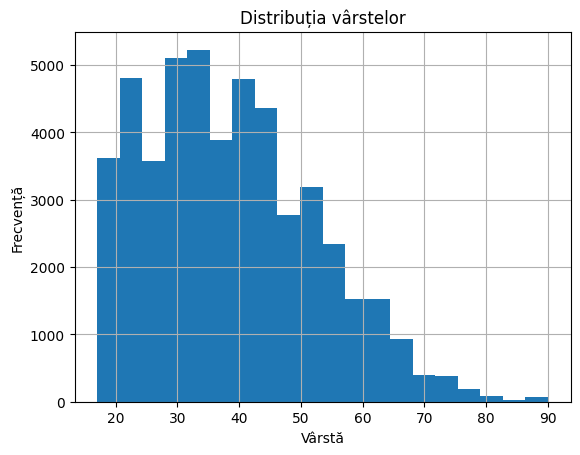

In [161]:
#1.
pdf = df.select("age").dropna().toPandas()
pdf.hist(column="age", bins=20)
plt.title("Distribuția vârstelor")
plt.xlabel("Vârstă")
plt.ylabel("Frecvență")
plt.grid(True)
plt.show()


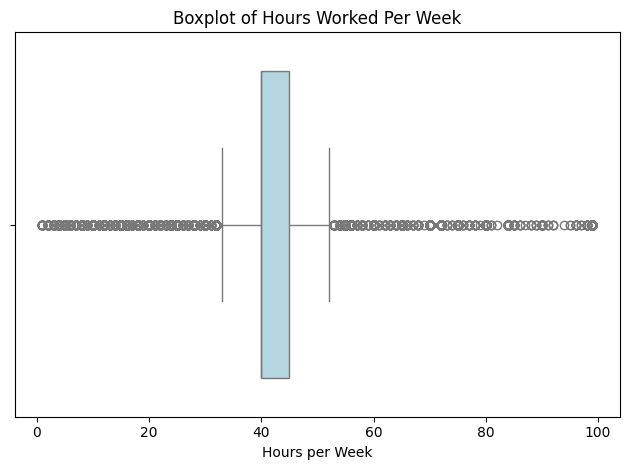

In [168]:
#2.
# Step 1: Start SparkSession
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Boxplot Hours per Week") \
    .getOrCreate()

# Step 2: Load the CSV into a Spark DataFrame
df_spark = spark.read.csv("hdfs://master:9000/sia1106/adult.csv", header=True, inferSchema=True)

# Step 3: Select the 'hours-per-week' column and drop nulls
hours_df = df_spark.select("hours-per-week").dropna()

# Step 4: Convert to Pandas DataFrame for plotting
hours_pd = hours_df.toPandas()

# Step 5: Create the boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=hours_pd["hours-per-week"], color='lightblue')
plt.title("Boxplot of Hours Worked Per Week")
plt.xlabel("Hours per Week")
plt.tight_layout()
plt.show()



In [164]:
df.columns


['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

/tmp/ipykernel_103194/3747857230.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=education_pd, x="count", y="education", palette="viridis")


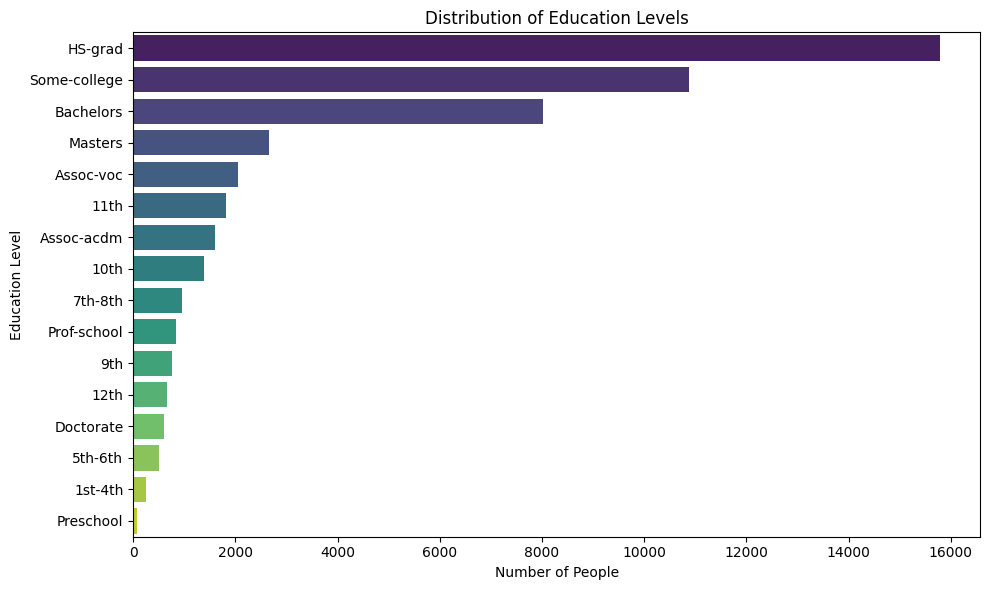

In [170]:
#3.
# Step 1: Group by 'education' and count
education_counts = df_spark.groupBy("education").count()

# Step 2: Convert to Pandas DataFrame
education_pd = education_counts.toPandas().sort_values(by="count", ascending=False)

# Step 3: Plot the bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=education_pd, x="count", y="education", palette="viridis")
plt.title("Distribution of Education Levels")
plt.xlabel("Number of People")
plt.ylabel("Education Level")
plt.tight_layout()
plt.show()


Numerical columns: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


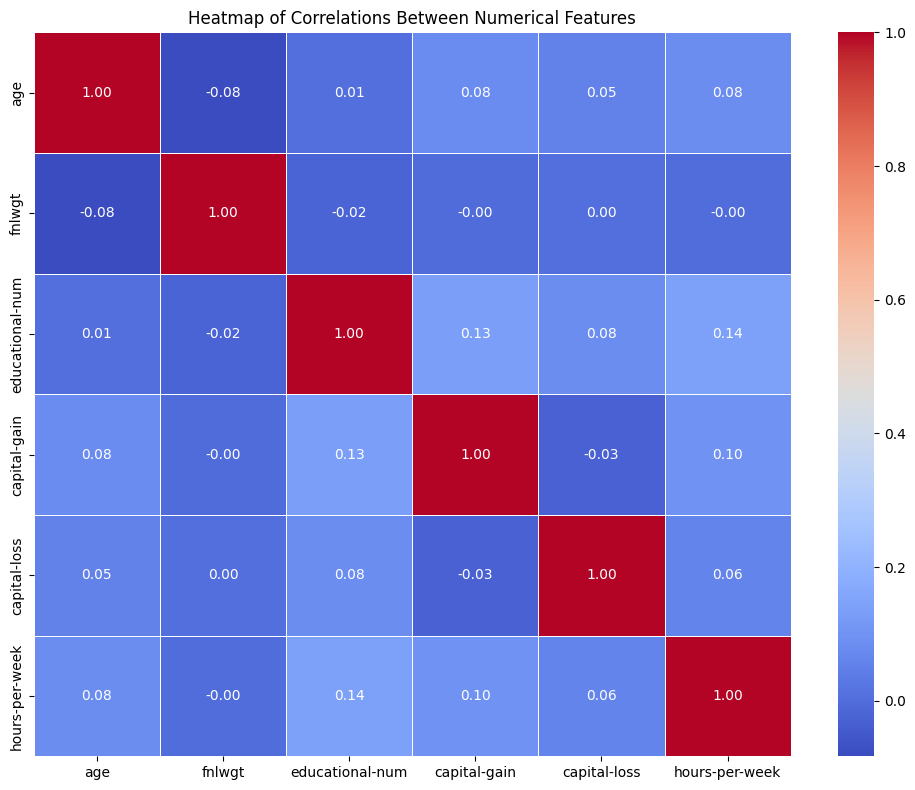

In [172]:
#4.
# Step 1: Identify numerical columns correctly
from pyspark.sql.types import IntegerType, DoubleType

numerical_cols = [field.name for field in df_spark.schema.fields 
                  if isinstance(field.dataType, (IntegerType, DoubleType))]

# Print to verify
print("Numerical columns:", numerical_cols)

# Step 2: Select these columns and drop nulls (just to be safe)
df_numerical = df_spark.select(numerical_cols).dropna()

# Optional: limit rows to avoid memory issues
df_numerical_pd = df_numerical.limit(10000).toPandas()

# Step 3: Check if there are any columns left
if df_numerical_pd.empty or df_numerical_pd.shape[1] == 0:
    print("No numeric data available for correlation heatmap.")
else:
    # Step 4: Compute correlation matrix
    corr_matrix = df_numerical_pd.corr()

    # Step 5: Plot the heatmap
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Heatmap of Correlations Between Numerical Features")
    plt.tight_layout()
    plt.show()


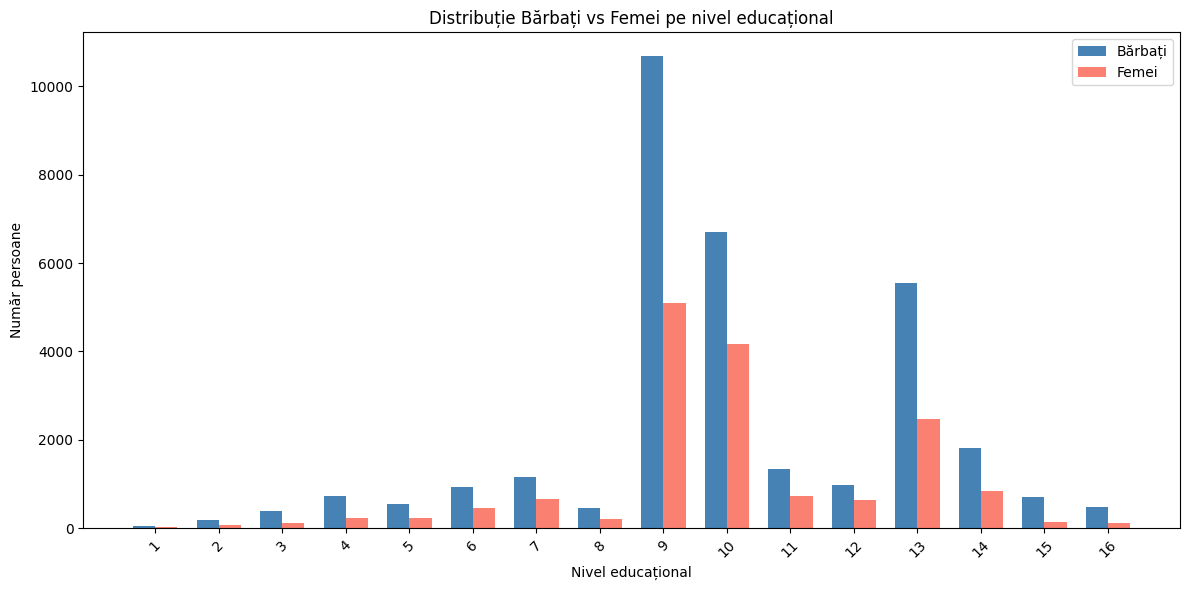

In [199]:
#5. Bar chart comparativ (numărul de bărbați și femei pentru fiecare nivel de educație)
import pandas as pd
import matplotlib.pyplot as plt

# Convertim rezultatul în Pandas DataFrame
df = result.toPandas()

# Setăm figura
plt.figure(figsize=(12,6))
bar_width = 0.35
index = range(len(df))

plt.bar(index, df['males'], bar_width, label='Bărbați', color='steelblue')
plt.bar([i + bar_width for i in index], df['females'], bar_width, label='Femei', color='salmon')

plt.xlabel('Nivel educațional')
plt.ylabel('Număr persoane')
plt.title('Distribuție Bărbați vs Femei pe nivel educațional')
plt.xticks([i + bar_width/2 for i in index], df['educational-num'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


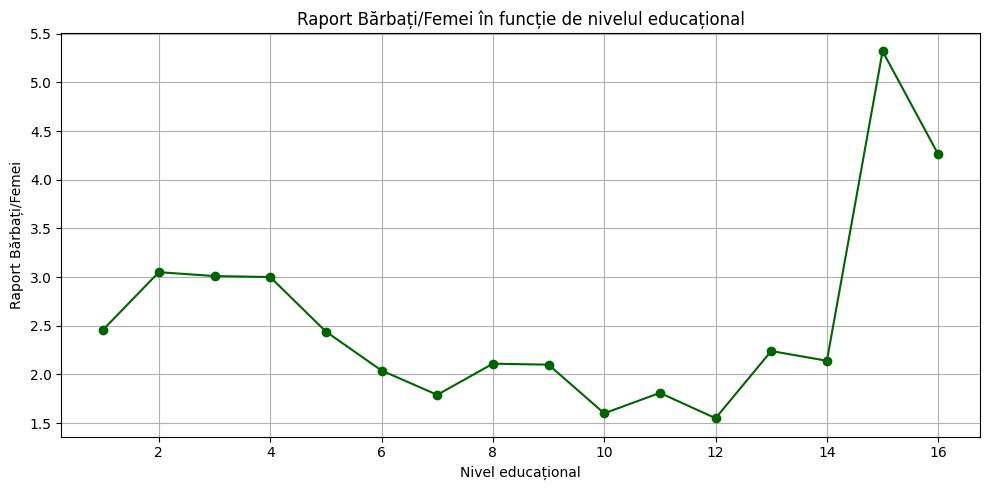

In [200]:
#6.raport bărbați/femei în funcție de educație
plt.figure(figsize=(10,5))
plt.plot(df['educational-num'], df['male_to_female_ratio'], marker='o', linestyle='-', color='darkgreen')
plt.title('Raport Bărbați/Femei în funcție de nivelul educațional')
plt.xlabel('Nivel educațional')
plt.ylabel('Raport Bărbați/Femei')
plt.grid(True)
plt.tight_layout()
plt.show()


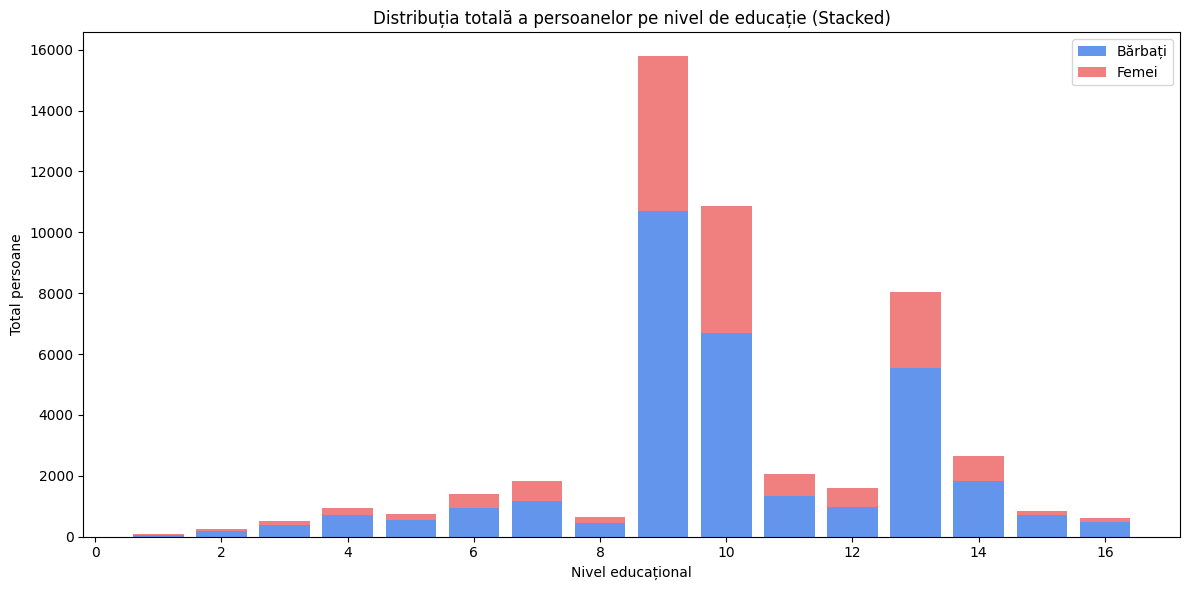

In [201]:
#7 Stacked bar chart (total persoane împărțite pe gen)
plt.figure(figsize=(12,6))
plt.bar(df['educational-num'], df['males'], label='Bărbați', color='cornflowerblue')
plt.bar(df['educational-num'], df['females'], bottom=df['males'], label='Femei', color='lightcoral')
plt.xlabel('Nivel educațional')
plt.ylabel('Total persoane')
plt.title('Distribuția totală a persoanelor pe nivel de educație (Stacked)')
plt.legend()
plt.tight_layout()
plt.show()


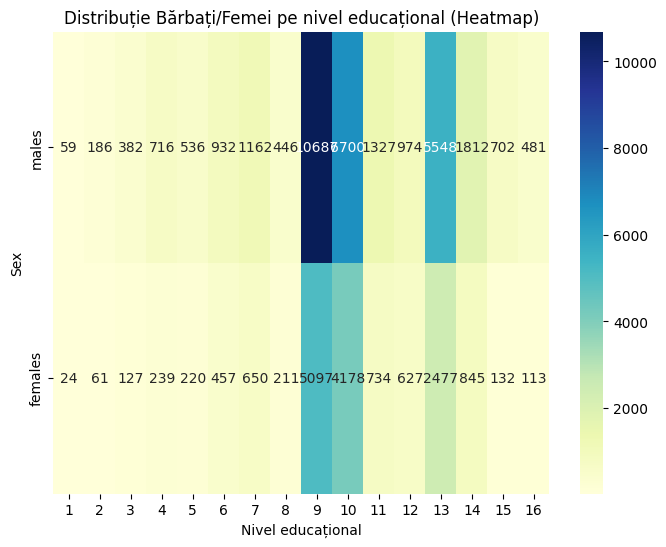

In [202]:
# 8. Heatmap (nivel educațional vs gen)

import seaborn as sns

# Transformare pentru heatmap
df_heatmap = df[['educational-num', 'males', 'females']].set_index('educational-num')
plt.figure(figsize=(8,6))
sns.heatmap(df_heatmap.T, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Distribuție Bărbați/Femei pe nivel educațional (Heatmap)')
plt.xlabel('Nivel educațional')
plt.ylabel('Sex')
plt.show()

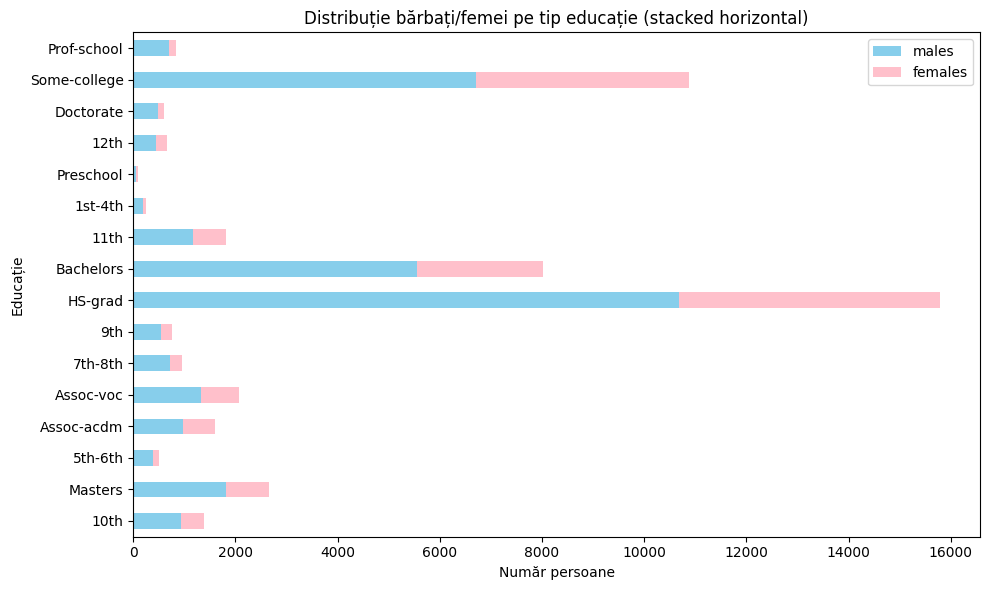

In [203]:
#9 presupunem că ai un alt DataFrame cu `education` în loc de `educational-num`
df2 = spark.sql("""
SELECT education, 
       SUM(CASE WHEN gender = 'Male' THEN 1 ELSE 0 END) AS males,
       SUM(CASE WHEN gender = 'Female' THEN 1 ELSE 0 END) AS females
FROM adults
GROUP BY education
""").toPandas()

df2.plot(kind='barh', x='education', stacked=True, figsize=(10, 6), color=['skyblue', 'pink'])
plt.title('Distribuție bărbați/femei pe tip educație (stacked horizontal)')
plt.xlabel('Număr persoane')
plt.ylabel('Educație')
plt.tight_layout()
plt.show()


In [222]:
#analiză exploratorie a datelor (EDA)

from pyspark.sql import SparkSession

# Start a Spark session
spark = SparkSession.builder.appName("Adult Dataset").getOrCreate()

# Load the CSV file
adults_df = spark.read.csv("hdfs://master:9000/sia1106/adult.csv", header=True, inferSchema=True)

# Now you can run your operations
adults_df.describe().show() ##Afișează statistici descriptive pentru toate coloanele numerice (count, mean, stddev, min, max).
adults_df.groupBy("education").count().orderBy("count", ascending=False).show()  #Grupează datele după nivelul de educație și le numără, ordonând descrescător după frecvență.


+-------+------------------+-----------+------------------+------------+------------------+--------------+----------------+------------+------------------+------+------------------+------------------+------------------+--------------+------+
|summary|               age|  workclass|            fnlwgt|   education|   educational-num|marital-status|      occupation|relationship|              race|gender|      capital-gain|      capital-loss|    hours-per-week|native-country|income|
+-------+------------------+-----------+------------------+------------+------------------+--------------+----------------+------------+------------------+------+------------------+------------------+------------------+--------------+------+
|  count|             48842|      48842|             48842|       48842|             48842|         48842|           48842|       48842|             48842| 48842|             48842|             48842|             48842|         48842| 48842|
|   mean| 38.64358543876172|    

In [229]:
#analiză exploratorie a datelor (EDA)
#Analizează distribuția veniturilor în funcție de sex, educație și ocupație.
from pyspark.sql import SparkSession

# Start a Spark session
spark = SparkSession.builder.appName("Adult Dataset").getOrCreate()

# Load the CSV file
adults_df = spark.read.csv("hdfs://master:9000/sia1106/adult.csv", header=True, inferSchema=True)



adults_df.groupBy("gender", "income").count().show()
adults_df.groupBy("educational-num").avg("age").orderBy("avg(age)", ascending=False).show()
adults_df.groupBy("occupation", "income").count().orderBy("count", ascending=False).show()


+------+------+-----+
|gender|income|count|
+------+------+-----+
|  Male| <=50K|22732|
|  Male|  >50K| 9918|
|Female| <=50K|14423|
|Female|  >50K| 1769|
+------+------+-----+

+---------------+------------------+
|educational-num|          avg(age)|
+---------------+------------------+
|              4| 49.52565445026178|
|             16| 47.53030303030303|
|              2| 46.63967611336032|
|             15| 45.15227817745804|
|             14| 44.00677455777193|
|              3|43.585461689587426|
|              1|42.204819277108435|
|              5|40.902116402116405|
|              9| 39.07380892042575|
|             13| 38.89632398753894|
|             11| 38.65114022319263|
|              6| 37.90280777537797|
|             12|37.777014366021234|
|             10| 35.67705460562603|
|              8| 32.23592085235921|
|              7| 32.14183222958057|
+---------------+------------------+

+-----------------+------+-----+
|       occupation|income|count|
+---------------

In [225]:
#model de regresie logistică pentru a prezice venitul (income) unei persoane pe baza unor caracteristici (vârstă, ore lucrate pe săptămână, nivel educațional numeric).


from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler, StringIndexer

# 1. Creează sesiunea Spark
spark = SparkSession.builder.appName("Adult Dataset").getOrCreate()

# 2. Încarcă datele
adults_df = spark.read.csv("hdfs://master:9000/sia1106/adult.csv", header=True, inferSchema=True)

# 3. Transformă coloana 'income' în etichetă numerică
indexer = StringIndexer(inputCol="income", outputCol="label")
indexed = indexer.fit(adults_df).transform(adults_df)

# 4. Vectorizează coloanele numerice
assembler = VectorAssembler(
    inputCols=["age", "hours-per-week", "educational-num"],
    outputCol="features"
)
data = assembler.transform(indexed)

# 5. Împarte în set de antrenare și testare
(trainingData, testData) = data.randomSplit([0.8, 0.2], seed=42)

# 6. Antrenează modelul de regresie logistică
lr = LogisticRegression()
model = lr.fit(trainingData)

# 7. Generează predicții
predictions = model.transform(testData)

# 8. Afișează câteva rezultate
predictions.select("features", "label", "prediction", "probability").show(10)


+---------------+-----+----------+--------------------+
|       features|label|prediction|         probability|
+---------------+-----+----------+--------------------+
|[17.0,50.0,7.0]|  0.0|       0.0|[0.96053310924768...|
|[17.0,25.0,6.0]|  0.0|       0.0|[0.99010513476150...|
|[17.0,15.0,4.0]|  0.0|       0.0|[0.99677017242424...|
|[17.0,15.0,6.0]|  0.0|       0.0|[0.99351079897563...|
|[17.0,18.0,7.0]|  0.0|       0.0|[0.98957449084926...|
|[17.0,20.0,6.0]|  0.0|       0.0|[0.99198545433846...|
|[17.0,40.0,9.0]|  0.0|       0.0|[0.94864881846072...|
|[17.0,40.0,6.0]|  0.0|       0.0|[0.98143667549693...|
|[17.0,10.0,7.0]|  0.0|       0.0|[0.99255890031982...|
|[17.0,14.0,6.0]|  0.0|       0.0|[0.99377932375260...|
+---------------+-----+----------+--------------------+
only showing top 10 rows



In [228]:
#Calculul metricei pentru ML(Evaluează performanța modelului cu două metrici importante: acuratețea (accuracy) și AUC (area under curve).


from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

# Accuracy
evaluator_acc = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_acc.evaluate(predictions)

# AUC
evaluator_auc = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc = evaluator_auc.evaluate(predictions)

print(f"Accuracy = {accuracy}")
print(f"AUC = {auc}")



Accuracy = 0.7810632598392747
AUC = 0.7903390401705804


In [176]:
# 1. Definirea și încărcarea datelor

from pyspark.sql import SparkSession

# Pornim Spark
spark = SparkSession.builder.appName("Adult Dataset").getOrCreate()

# Încărcăm fișierul adult.csv
adult_df = spark.read.csv("hdfs://master:9000/sia1106/adult.csv", header=True, inferSchema=True)

# Cream două tabele suplimentare pentru exemplu
country_df = adult_df.select("native-country").distinct().withColumnRenamed("native-country", "country")
education_df = adult_df.select("education", "educational-num").distinct()

In [177]:
#2. Înregistrarea tabelelor ca SQL views
adult_df.createOrReplaceTempView("adults")
country_df.createOrReplaceTempView("countries")
education_df.createOrReplaceTempView("education_levels")


In [179]:
#1. Distribuția nivelurilor de educație după țară

result = spark.sql("""
    SELECT a.`native-country`, e.education, COUNT(*) AS cnt
    FROM adults a
    JOIN education_levels e ON a.education = e.education
    GROUP BY a.`native-country`, e.education
""")

result.show()


[Stage 83:>                                                         (0 + 2) / 2]

+--------------------+------------+----+
|      native-country|   education| cnt|
+--------------------+------------+----+
|                Hong|   Preschool|   1|
|         Philippines|     HS-grad|  53|
|              France|Some-college|   6|
|               India|Some-college|  17|
|       United-States|     7th-8th| 741|
|               Italy|  Assoc-acdm|   4|
|               Italy|     Masters|   6|
|              Mexico|   Preschool|  31|
|         El-Salvador|     1st-4th|  13|
|       United-States|         9th| 588|
|             Vietnam|     1st-4th|   3|
|       United-States|   Bachelors|7184|
|         Puerto-Rico|   Bachelors|  17|
|                   ?|   Doctorate|  32|
|               China|     7th-8th|   5|
|          Yugoslavia|        10th|   1|
|  Dominican-Republic|        12th|   8|
|     Trinadad&Tobago|     HS-grad|   9|
|Outlying-US(Guam-...|     HS-grad|   4|
|         Puerto-Rico|        11th|  18|
+--------------------+------------+----+
only showing top

In [180]:
#2. Venitul mediu (hours-per-week) pe țară
result = spark.sql("""
SELECT a.`native-country`, AVG(a.`hours-per-week`) AS avg_hours
FROM adults a
GROUP BY a.`native-country`
ORDER BY avg_hours DESC
""")

result.show()

+--------------------+------------------+
|      native-country|         avg_hours|
+--------------------+------------------+
|              Greece| 46.89795918367347|
|            Thailand|              44.7|
|                Iran| 42.94915254237288|
|               South| 42.85217391304348|
|              France| 42.78947368421053|
|             Ireland|42.432432432432435|
|               Japan| 42.28260869565217|
|            Portugal| 42.23880597014925|
|            Cambodia|42.035714285714285|
|             England| 41.93700787401575|
|            Scotland|41.666666666666664|
|  Dominican-Republic| 41.62135922330097|
|               India| 41.42384105960265|
|Outlying-US(Guam-...| 41.34782608695652|
|                   ?| 41.03267211201867|
|               Italy| 40.94285714285714|
|             Germany| 40.81553398058252|
|       United-States|40.440773863843766|
|              Canada| 40.40659340659341|
|                Hong|40.266666666666666|
+--------------------+------------

In [190]:
#3. Câte persoane cu studii superioare sunt în fiecare țară
result = spark.sql("""
SELECT a.`native-country`, COUNT(*) AS graduates
FROM adults a
JOIN education_levels e ON a.education = e.education
WHERE e.`educational-num` >= 13
GROUP BY a.`native-country`
""")

result.show()

+--------------+---------+
|native-country|graduates|
+--------------+---------+
|   Philippines|      130|
|       Germany|       69|
|        France|       21|
|        Greece|       11|
|        Taiwan|       53|
|       Ecuador|        8|
|     Nicaragua|        7|
|          Hong|       13|
|          Peru|       10|
|         China|       69|
|         India|      105|
|         Italy|       23|
|          Cuba|       36|
|         South|       43|
|          Iran|       33|
|       Ireland|        9|
|      Thailand|       10|
|          Laos|        4|
|   El-Salvador|       13|
|        Mexico|       55|
+--------------+---------+
only showing top 20 rows



In [191]:
#4. Categoriile de muncă cu cei mai mulți angajați educați
result = spark.sql("""
SELECT a.`workclass`, COUNT(*) AS educated
FROM adults a
JOIN education_levels e ON a.education = e.education
WHERE e.`educational-num` > 12
GROUP BY a.`workclass`
ORDER BY educated DESC
""")

result.show()

+----------------+--------+
|       workclass|educated|
+----------------+--------+
|         Private|    7303|
|       Local-gov|    1302|
|Self-emp-not-inc|    1086|
|       State-gov|     860|
|    Self-emp-inc|     714|
|     Federal-gov|     483|
|               ?|     362|
+----------------+--------+



In [198]:
#5. Raport bărbați/femei pe educație
result = spark.sql("""
SELECT `educational-num`, 
       SUM(CASE WHEN gender = 'Male' THEN 1 ELSE 0 END) AS males,
       SUM(CASE WHEN gender = 'Female' THEN 1 ELSE 0 END) AS females,
       ROUND(
           SUM(CASE WHEN gender = 'Male' THEN 1 ELSE 0 END) * 1.0 / 
           SUM(CASE WHEN gender = 'Female' THEN 1 ELSE 0 END), 2
       ) AS male_to_female_ratio
FROM adults
GROUP BY `educational-num`
ORDER BY `educational-num`
""")

result.show()





+---------------+-----+-------+--------------------+
|educational-num|males|females|male_to_female_ratio|
+---------------+-----+-------+--------------------+
|              1|   59|     24|                2.46|
|              2|  186|     61|                3.05|
|              3|  382|    127|                3.01|
|              4|  716|    239|                3.00|
|              5|  536|    220|                2.44|
|              6|  932|    457|                2.04|
|              7| 1162|    650|                1.79|
|              8|  446|    211|                2.11|
|              9|10687|   5097|                2.10|
|             10| 6700|   4178|                1.60|
|             11| 1327|    734|                1.81|
|             12|  974|    627|                1.55|
|             13| 5548|   2477|                2.24|
|             14| 1812|    845|                2.14|
|             15|  702|    132|                5.32|
|             16|  481|    113|               

In [185]:
#6. Timpul mediu de muncă pe nivel educațional
result = spark.sql("""
SELECT e.education, AVG(a.`hours-per-week`) AS avg_hours
FROM adults a
JOIN education_levels e ON a.education = e.education
GROUP BY e.education
ORDER BY avg_hours DESC
""")

result.show()

+------------+------------------+
|   education|         avg_hours|
+------------+------------------+
| Prof-school| 47.57913669064748|
|   Doctorate|46.582491582491585|
|     Masters|43.575837410613474|
|   Bachelors| 42.48249221183801|
|   Assoc-voc|41.658418243571084|
|  Assoc-acdm| 40.80949406620862|
|     HS-grad|  40.6407754688292|
|     7th-8th|39.003141361256546|
|     5th-6th|38.923379174852656|
|Some-college| 38.86578415149844|
|     1st-4th| 38.76113360323887|
|         9th| 38.35978835978836|
|        10th| 36.98632109431246|
|   Preschool|36.566265060240966|
|        12th| 35.37442922374429|
|        11th| 33.95253863134658|
+------------+------------------+



In [186]:
#7. Câți oameni >50K per educație și țară
result = spark.sql("""
SELECT e.education, a.`native-country`, COUNT(*) AS high_earners
FROM adults a
JOIN education_levels e ON a.education = e.education
WHERE a.income = '>50K'
GROUP BY e.education, a.`native-country`
ORDER BY high_earners DESC
""")

result.show()

+------------+--------------+------------+
|   education|native-country|high_earners|
+------------+--------------+------------+
|   Bachelors| United-States|        3020|
|     HS-grad| United-States|        2352|
|Some-college| United-States|        1939|
|     Masters| United-States|        1310|
| Prof-school| United-States|         547|
|   Assoc-voc| United-States|         485|
|  Assoc-acdm| United-States|         385|
|   Doctorate| United-States|         353|
|        11th| United-States|          85|
|        10th| United-States|          83|
|   Bachelors|             ?|          77|
|     7th-8th| United-States|          47|
|   Bachelors|   Philippines|          45|
|        12th| United-States|          42|
|     Masters|             ?|          37|
|         9th| United-States|          35|
|Some-college|             ?|          26|
|     HS-grad|             ?|          22|
|   Doctorate|             ?|          20|
|   Bachelors|       Germany|          18|
+----------

In [187]:
#8. Țările cu cel mai mare procent de persoane >50K
result = spark.sql("""
SELECT a.`native-country`,
       ROUND(SUM(CASE WHEN a.income = '>50K' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS percent_high_income
FROM adults a
GROUP BY a.`native-country`
ORDER BY percent_high_income DESC
""")

result.show()

+--------------+-------------------+
|native-country|percent_high_income|
+--------------+-------------------+
|        France|              42.11|
|         India|              41.06|
|        Taiwan|              40.00|
|          Iran|              37.29|
|       England|              37.01|
|        Greece|              36.73|
|    Yugoslavia|              34.78|
|         Japan|              34.78|
|        Canada|              34.62|
|         Italy|              32.38|
|      Cambodia|              32.14|
|       Hungary|              31.58|
|       Ireland|              29.73|
|         China|              29.51|
|   Philippines|              28.81|
|       Germany|              28.16|
|          Hong|              26.67|
|             ?|              25.67|
|          Cuba|              24.64|
| United-States|              24.40|
+--------------+-------------------+
only showing top 20 rows



In [188]:
#9. Numărul total de angajați vs neangajați pe țară
result = spark.sql("""
SELECT a.`native-country`,
       SUM(CASE WHEN a.`workclass` = 'Unemployed' THEN 1 ELSE 0 END) AS unemployed,
       COUNT(*) AS total
FROM adults a
GROUP BY a.`native-country`
""")

result.show()

+--------------+----------+-----+
|native-country|unemployed|total|
+--------------+----------+-----+
|   Philippines|         0|  295|
|       Germany|         0|  206|
|      Cambodia|         0|   28|
|        France|         0|   38|
|        Greece|         0|   49|
|        Taiwan|         0|   65|
|       Ecuador|         0|   45|
|     Nicaragua|         0|   49|
|          Hong|         0|   30|
|          Peru|         0|   46|
|         India|         0|  151|
|         China|         0|  122|
|         Italy|         0|  105|
|          Cuba|         0|  138|
|         South|         0|  115|
|          Iran|         0|   59|
|       Ireland|         0|   37|
|      Thailand|         0|   30|
|          Laos|         0|   23|
|   El-Salvador|         0|  155|
+--------------+----------+-----+
only showing top 20 rows



In [189]:
#10. Ce educație au cei care muncesc >60 ore/săptămână
result = spark.sql("""
SELECT e.education, COUNT(*) AS count
FROM adults a
JOIN education_levels e ON a.education = e.education
WHERE a.`hours-per-week` > 60
GROUP BY e.education
ORDER BY count DESC
""")

result.show()

+------------+-----+
|   education|count|
+------------+-----+
|     HS-grad|  523|
|Some-college|  337|
|   Bachelors|  258|
|     Masters|  116|
| Prof-school|   83|
|   Assoc-voc|   69|
|        10th|   53|
|  Assoc-acdm|   50|
|   Doctorate|   50|
|     7th-8th|   45|
|        11th|   41|
|         9th|   17|
|     5th-6th|   13|
|     1st-4th|   11|
|        12th|    8|
|   Preschool|    2|
+------------+-----+

